# Damped harmonic oscillator

Here we show how to simulate a damped harmonic oscillator, defined by the equation:

$$ m\frac{d^2 x}{dt^2}=-kx - b\frac{dx}{dt}$$

where $m$ is the mass, $k$ is the spring constant and $b$ is a damping parameter. Defining $y = \dot{x}$, we can reduce the previous second order equation to the first order system:

$$ \frac{dx}{dt}= y, \ \ \ \frac{dy}{dt}= - \omega^2 x -by$$

where $\omega = \sqrt{k/m}$

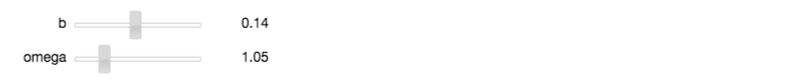

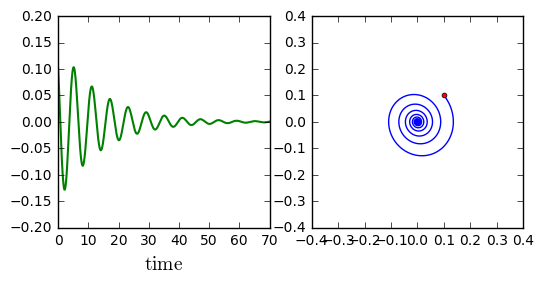

In [1]:
import matplotlib
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython import *
from IPython.html.widgets import *
from IPython.display import display

k = 0.5
m = 1
b = 0.3

omega = sqrt(k/m)

def dh(b,omega):
    
    f, (ax1, ax2) = plt.subplots(1,2, sharey=False, sharex=False )
    f.subplots_adjust(wspace = 0.2, hspace=0)
    
    def func(z,t,omega,b):
        x, y = z
        dzdt = [y, -(omega**2)*x - b*y]
        return dzdt

    zinit = [0.1, 0.1]
    t = np.linspace(0, 200, 5000)
    z = odeint(func, zinit, t, args=(omega,b))

    ax1.plot(t, z[:, 1],'g', linewidth = 1.5)
    ax1.axis([0,70,-0.2,0.2])
    ax1.set_xlabel(r'$\rm time$', fontsize = 14)
    ax1.set_aspect(175, adjustable = 'box')

    ax2.plot(z[:, 0],z[:, 1],'b')
    ax2.plot(0.1,0.1,'ro', markersize = 3.5)
    ax2.axis([-0.4,0.4,-0.4,0.4])
    ax2.set_aspect('equal',adjustable='box')
    plt.show()
    
widgets.interact(dh, b = (0,0.3,0.005), omega = (0,5,0.01))